<a href="https://colab.research.google.com/github/Kanchan747/Data-Analysis-work/blob/main/A_B_Testing_First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importbasics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving marketing_AB.csv to marketing_AB.csv


In [3]:
# prompt: give me code to read the data

import pandas as pd
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

import io
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

User uploaded file "marketing_AB.csv" with length 21980992 bytes


In [4]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
# prompt: give me code to check if we have any duplicates with respect to user id

if df['user id'].duplicated().any():
  print("Duplicates found in 'user id' column.")
else:
  print("No duplicates found in 'user id' column.")

# Optional: View the duplicate rows
duplicate_rows = df[df['user id'].duplicated(keep=False)]
print("\nDuplicate rows based on 'user id':")
duplicate_rows

No duplicates found in 'user id' column.

Duplicate rows based on 'user id':


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour


In [6]:
# prompt: give me code to drop "Unnamed: 0"	 and "user id" column

df = df.drop(["Unnamed: 0", "user id"], axis=1)

In [7]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [8]:
df_cat = df[["test group", "converted", "most ads hour", "most ads day"]]
df_cat.nunique()

,0
test group,2
converted,2
most ads hour,24
most ads day,7


In [9]:
# prompt: give me code to check if the categorical columns have appropriate levels

# Check levels in categorical columns
for col in df_cat.columns:
  print(f"\nValue counts for column: {col}")
  print(df_cat[col].value_counts())
  print(f"Number of unique levels: {df_cat[col].nunique()}")


Value counts for column: test group
test group
ad     564577
psa     23524
Name: count, dtype: int64
Number of unique levels: 2

Value counts for column: converted
converted
False    573258
True      14843
Name: count, dtype: int64
Number of unique levels: 2

Value counts for column: most ads hour
most ads hour
13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: count, dtype: int64
Number of unique levels: 24

Value counts for column: most ads day
most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64
Number of unique levels: 7


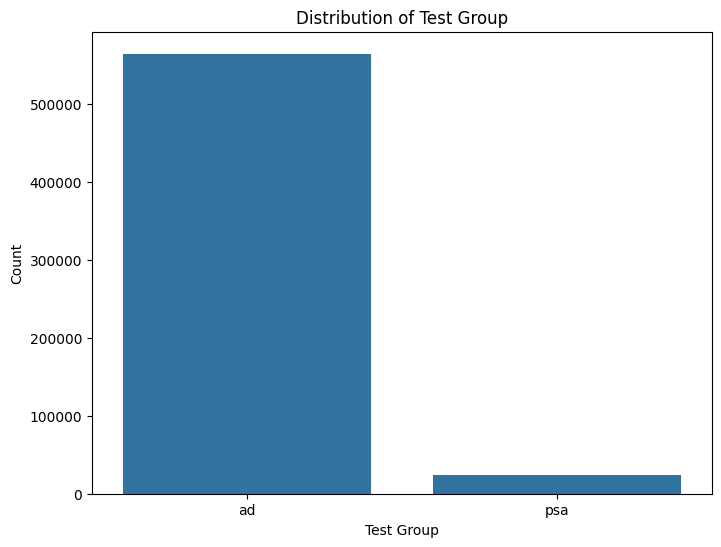


Univariate Analysis for 'test group':


,Count,Percentage
test group,,
ad,564577,96.000007
psa,23524,3.999993


In [10]:
# prompt: give me code to do the univariate analysis for the categorical variable "test group"

import pandas as pd
import matplotlib.pyplot as plt
# Univariate Analysis for "test group"
plt.figure(figsize=(8, 6))
sns.countplot(x='test group', data=df_cat)
plt.title('Distribution of Test Group')
plt.xlabel('Test Group')
plt.ylabel('Count')
plt.show()

# Percentage distribution
test_group_counts = df_cat['test group'].value_counts()
test_group_percentages = df_cat['test group'].value_counts(normalize=True) * 100

test_group_analysis = pd.DataFrame({'Count': test_group_counts, 'Percentage': test_group_percentages})
print("\nUnivariate Analysis for 'test group':")
test_group_analysis

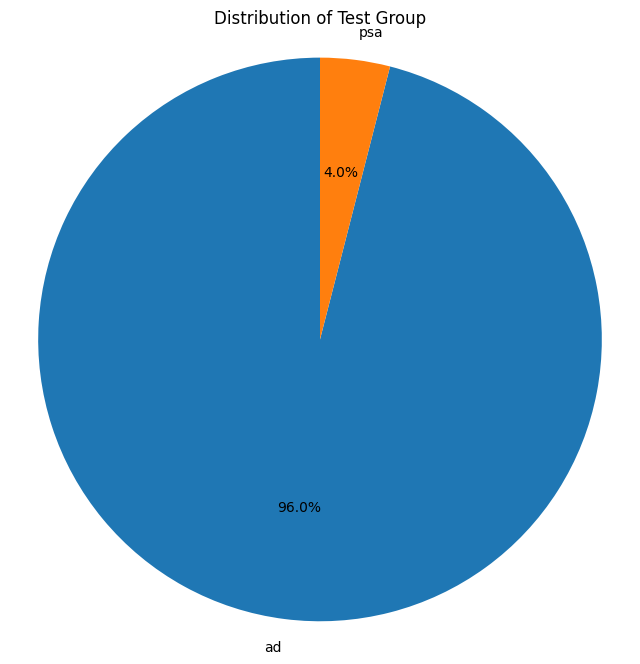

In [11]:
# prompt: give me the code for pie chart for the univariate analysis of the categorical variable of "test group"

import matplotlib.pyplot as plt
# Pie chart for the univariate analysis of "test group"
plt.figure(figsize=(8, 8))
plt.pie(test_group_counts, labels=test_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Test Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

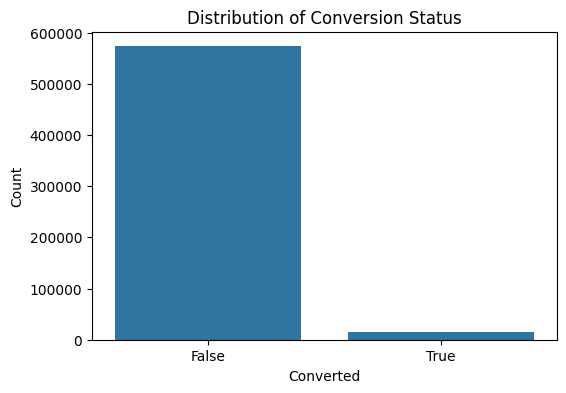


Univariate Analysis for 'converted':
            Count  Percentage
converted                    
False      573258   97.476114
True        14843    2.523886


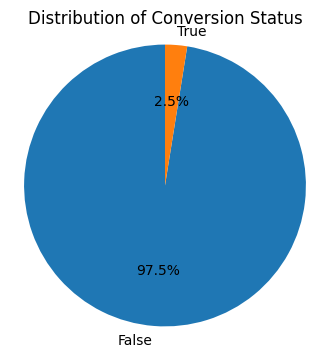

In [12]:
# prompt: give me the code to the univariate analysis for the categorical variable "converted"

import pandas as pd
import matplotlib.pyplot as plt
# Univariate Analysis for "converted"
plt.figure(figsize=(6, 4))
sns.countplot(x='converted', data=df_cat)
plt.title('Distribution of Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

# Percentage distribution
converted_counts = df_cat['converted'].value_counts()
converted_percentages = df_cat['converted'].value_counts(normalize=True) * 100

converted_analysis = pd.DataFrame({'Count': converted_counts, 'Percentage': converted_percentages})
print("\nUnivariate Analysis for 'converted':")
print(converted_analysis)

# Pie chart for the univariate analysis of "converted"
plt.figure(figsize=(4, 4))
plt.pie(converted_counts, labels=converted_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Conversion Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

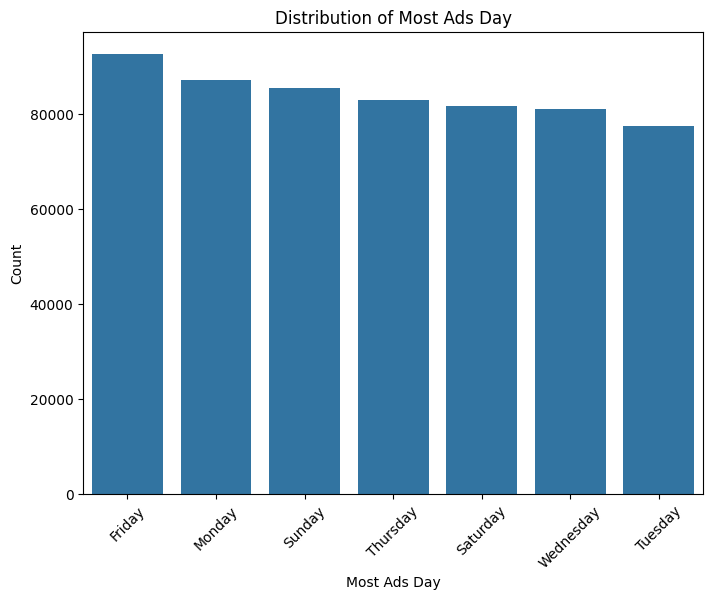


Univariate Analysis for 'most ads day':


,Count,Percentage
most ads day,,
Friday,92608,15.746955
Monday,87073,14.805790
Sunday,85391,14.519785
Thursday,82982,14.110161
Saturday,81660,13.885370
Wednesday,80908,13.757501
Tuesday,77479,13.174438


In [13]:
# prompt: give me code for the univariate analysis of the categorical variable "most ads days"

import pandas as pd
import matplotlib.pyplot as plt
# Univariate Analysis for "most ads day"
plt.figure(figsize=(8, 6))
sns.countplot(x='most ads day', data=df_cat, order=df_cat['most ads day'].value_counts().index)
plt.title('Distribution of Most Ads Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Percentage distribution
most_ads_day_counts = df_cat['most ads day'].value_counts()
most_ads_day_percentages = df_cat['most ads day'].value_counts(normalize=True) * 100

most_ads_day_analysis = pd.DataFrame({'Count': most_ads_day_counts, 'Percentage': most_ads_day_percentages})
print("\nUnivariate Analysis for 'most ads day':")
most_ads_day_analysis

# Pie chart for the univariate analysis of "most ads day" (Optional, might be too many slices)
# If you have many unique days, a bar chart is generally better for readability.
# Uncomment the following lines if you want to see the pie chart despite potential clutter.

# plt.figure(figsize=(8, 8))
# plt.pie(most_ads_day_counts, labels=most_ads_day_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title('Distribution of Most Ads Day')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()

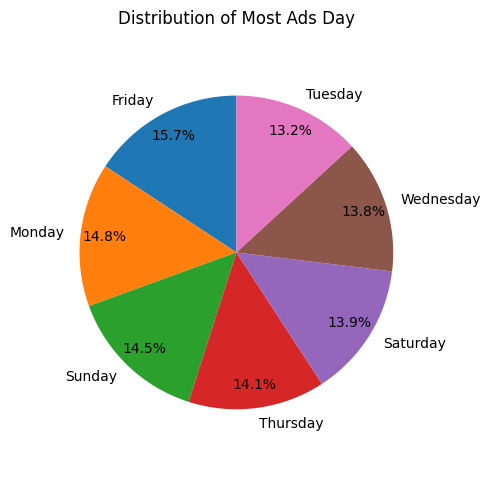

In [14]:
# prompt: also give the code for univariate analysis pie chart of the categorical variable the "most ads days"

import matplotlib.pyplot as plt
# Pie chart for the univariate analysis of "most ads day"
# As noted in the comment in the preceding code, a pie chart might be cluttered
# if there are many unique days. However, based on the value counts printout,
# there are only 7 unique days, which is manageable for a pie chart.
plt.figure(figsize=(5, 5)) # Increase figure size for better readability
plt.pie(most_ads_day_counts, labels=most_ads_day_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribution of Most Ads Day')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

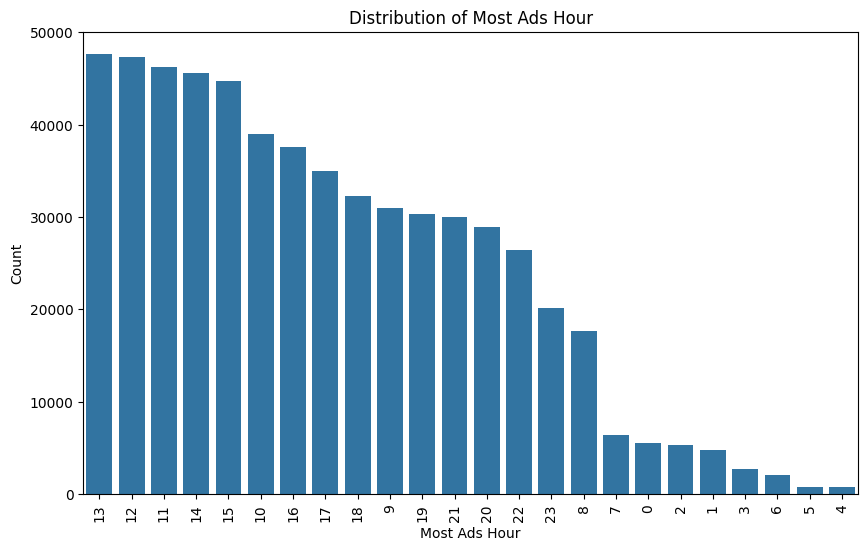


Univariate Analysis for 'most ads hour':


,Count,Percentage
most ads hour,,
13,47655,8.103200
12,47298,8.042496
11,46210,7.857494
14,45648,7.761932
15,44683,7.597845
10,38939,6.621142
16,37567,6.387848
17,34988,5.949318
18,32323,5.496165


In [15]:
# prompt: give me the code for univariate analysis of the categorical variable "most ads hour"

import pandas as pd
import matplotlib.pyplot as plt
# Univariate Analysis for "most ads hour"
plt.figure(figsize=(10, 6)) # Increase figure size for better visibility of hours
sns.countplot(x='most ads hour', data=df_cat, order=df_cat['most ads hour'].value_counts().index)
plt.title('Distribution of Most Ads Hour')
plt.xlabel('Most Ads Hour')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability if many hours
plt.show()

# Percentage distribution
most_ads_hour_counts = df_cat['most ads hour'].value_counts()
most_ads_hour_percentages = df_cat['most ads hour'].value_counts(normalize=True) * 100

most_ads_hour_analysis = pd.DataFrame({'Count': most_ads_hour_counts, 'Percentage': most_ads_hour_percentages})
print("\nUnivariate Analysis for 'most ads hour':")
most_ads_hour_analysis

# Pie chart for the univariate analysis of "most ads hour"
# A pie chart for 24 hours might be too cluttered. A bar chart is generally preferred.
# However, if the number of unique hours is small or you specifically want a pie chart,
# uncomment and adjust the following code.
# In this case, there are 24 possible hours, so a pie chart is likely too busy.
# The bar chart above is sufficient.

# If you still want to attempt a pie chart (might be very cluttered):
# plt.figure(figsize=(10, 10))
# plt.pie(most_ads_hour_counts, labels=most_ads_hour_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title('Distribution of Most Ads Hour')
# plt.axis('equal')
# plt.show()


Univariate Analysis for 'total ads':
count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64


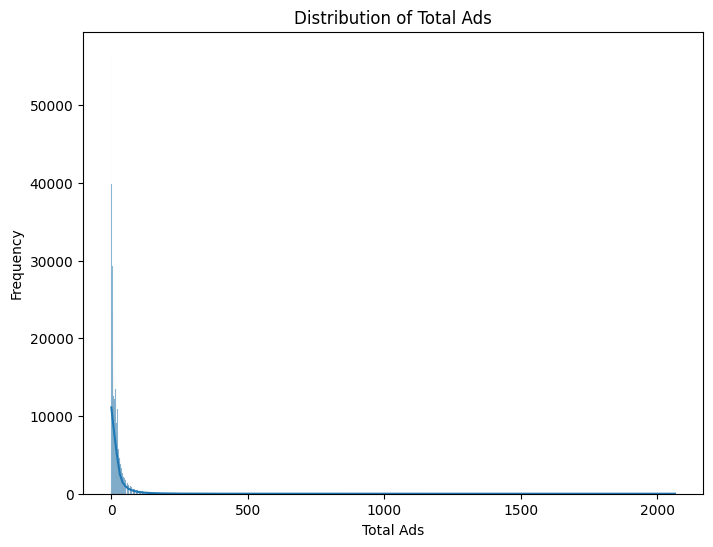

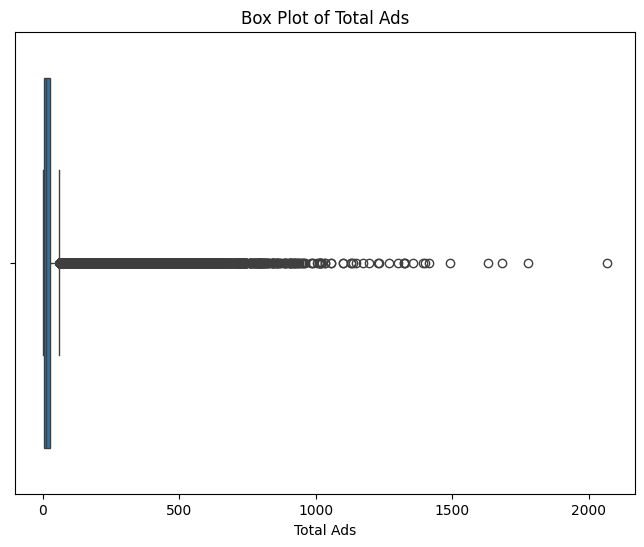

In [16]:
# prompt: give me the code to do the univariate analysis for the numerical variable "total ads"

import matplotlib.pyplot as plt
# Define the numerical columns
df_num = df[['total ads',]]

# Univariate Analysis for "total ads" (Numerical Variable)

# Summary Statistics
print("\nUnivariate Analysis for 'total ads':")
print(df_num['total ads'].describe())

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_num['total ads'], kde=True)
plt.title('Distribution of Total Ads')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_num['total ads'])
plt.title('Box Plot of Total Ads')
plt.xlabel('Total Ads')
plt.show()

In [17]:
# prompt: suggest me the analysis for numerical variable "total ads as the results are not clear in univariate analysis"

print("\nSkewness of 'total ads':", df_num['total ads'].skew())
print("Kurtosis of 'total ads':", df_num['total ads'].kurtosis())



Skewness of 'total ads': 7.433113001521166
Kurtosis of 'total ads': 109.91798253363802



The 75th percentile (Q3) for 'total ads' is: 27.00

Univariate Analysis for 'total ads' values up to the 75th percentile:
count    442253.000000
mean          9.795009
std           7.628273
min           1.000000
25%           3.000000
50%           8.000000
75%          16.000000
max          27.000000
Name: total ads, dtype: float64


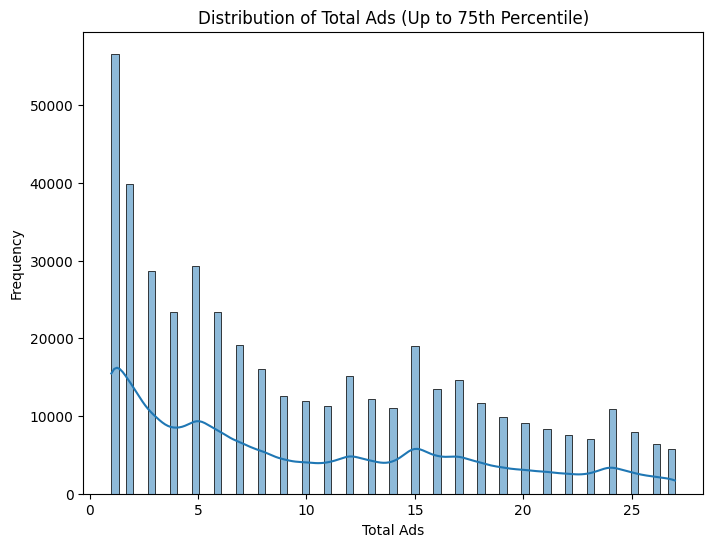

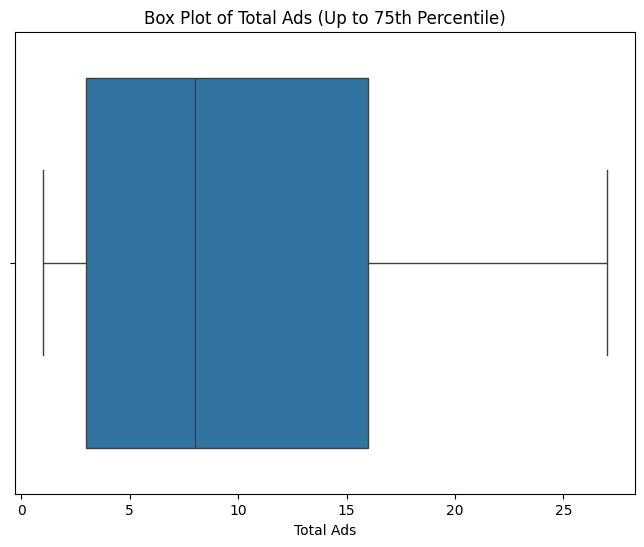


Skewness of 'total ads' (up to 75th percentile): 0.6022326769071926
Kurtosis of 'total ads' (up to 75th percentile): -0.84559942294291


In [18]:
# prompt: give me the code to do the univariate analysis for the values that covers the 75% of the data in the categorical variable "total ads"

import matplotlib.pyplot as plt
# To find the values that cover 75% of the data in 'total ads',
# we can look at the quantiles. Specifically, the values between
# the 0th percentile (min) and the 75th percentile.

# Get the 75th percentile (Q3)
q3 = df_num['total ads'].quantile(0.75)

print(f"\nThe 75th percentile (Q3) for 'total ads' is: {q3:.2f}")

# To get the range of values covering the first 75% of the data,
# we can filter the dataframe to include values less than or equal to Q3.
# Then we can perform univariate analysis on this subset.

df_total_ads_first_75_percent = df_num[df_num['total ads'] <= q3]

print("\nUnivariate Analysis for 'total ads' values up to the 75th percentile:")
print(df_total_ads_first_75_percent['total ads'].describe())

# You can also visualize the distribution of these values

# Histogram for the first 75% of data
plt.figure(figsize=(8, 6))
sns.histplot(df_total_ads_first_75_percent['total ads'], kde=True)
plt.title('Distribution of Total Ads (Up to 75th Percentile)')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.show()

# Box Plot for the first 75% of data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_total_ads_first_75_percent['total ads'])
plt.title('Box Plot of Total Ads (Up to 75th Percentile)')
plt.xlabel('Total Ads')
plt.show()

print("\nSkewness of 'total ads' (up to 75th percentile):", df_total_ads_first_75_percent['total ads'].skew())
print("Kurtosis of 'total ads' (up to 75th percentile):", df_total_ads_first_75_percent['total ads'].kurtosis())


Bivariate Analysis: test group vs. converted

Contingency Table:
converted    False  True 
test group               
ad          550154  14423
psa          23104    420

Conversion Rates by test group:
converted      False     True 
test group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


<Figure size 1000x600 with 0 Axes>

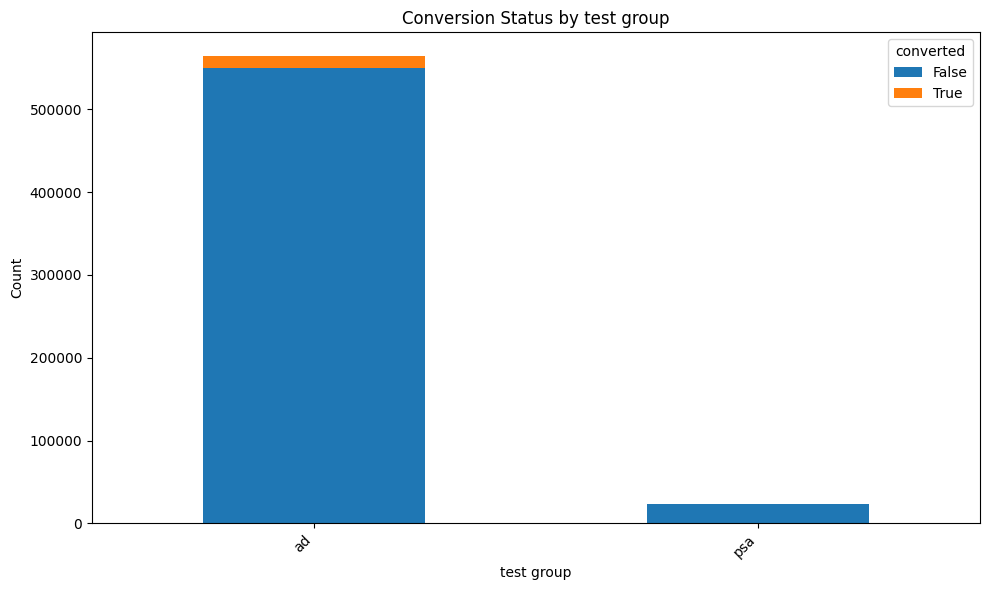

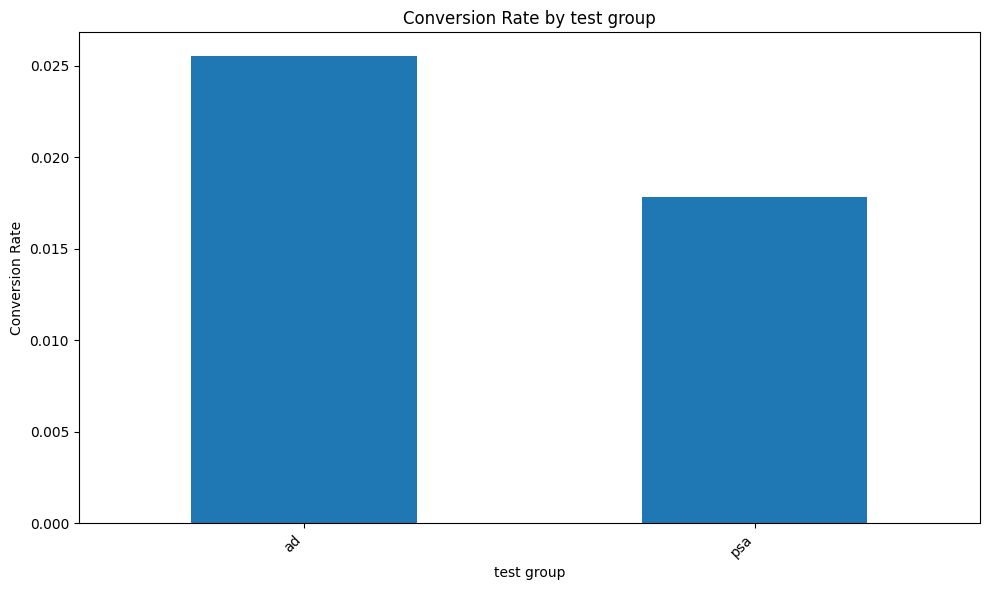


Bivariate Analysis: most ads hour vs. converted

Contingency Table:
converted      False  True 
most ads hour              
0               5434    102
1               4740     62
2               5294     39
3               2651     28
4                711     11
5                749     16
6               2022     46
7               6289    116
8              17283    344
9              30409    595
10             38101    838
11             45188   1022
12             46171   1127
13             46479   1176
14             44367   1281
15             43358   1325
16             36411   1156
17             34001    987
18             31438    885
19             29541    811
20             28061    862
21             29109    867
22             25742    690
23             19709    457

Conversion Rates by most ads hour:
converted         False     True 
most ads hour                    
0              0.981575  0.018425
1              0.987089  0.012911
2              0.992687  0.0073

<Figure size 1000x600 with 0 Axes>

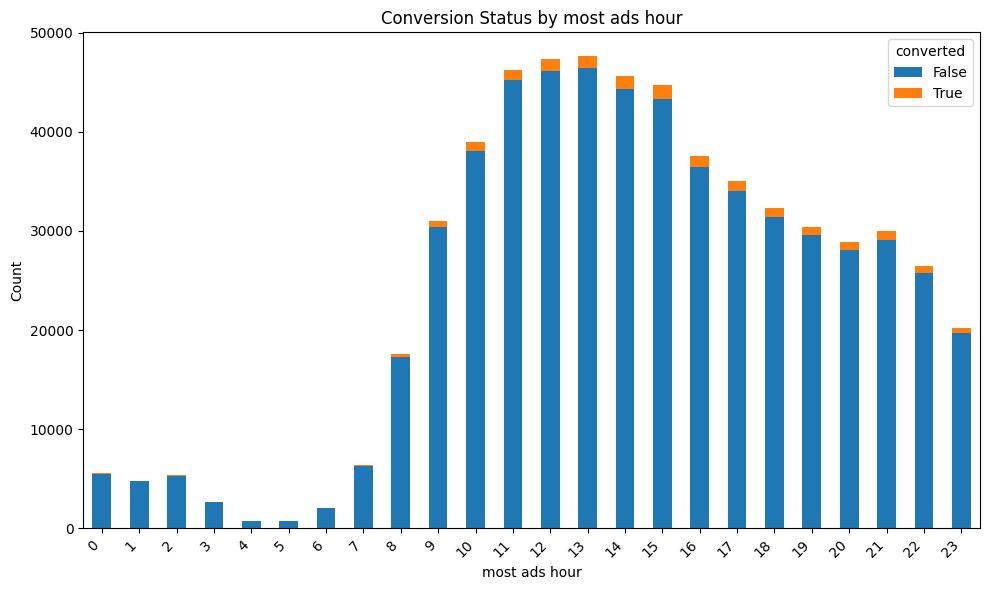

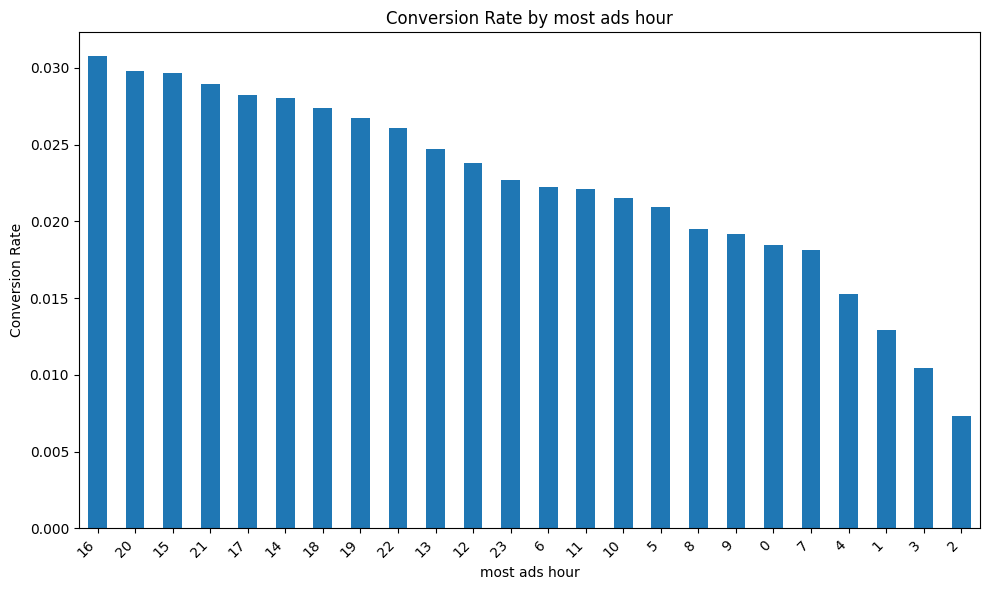


Bivariate Analysis: most ads day vs. converted

Contingency Table:
converted     False  True 
most ads day              
Friday        90551   2057
Monday        84216   2857
Saturday      79941   1719
Sunday        83301   2090
Thursday      81192   1790
Tuesday       75167   2312
Wednesday     78890   2018

Conversion Rates by most ads day:
converted        False     True 
most ads day                    
Friday        0.977788  0.022212
Monday        0.967188  0.032812
Saturday      0.978949  0.021051
Sunday        0.975524  0.024476
Thursday      0.978429  0.021571
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942


<Figure size 1000x600 with 0 Axes>

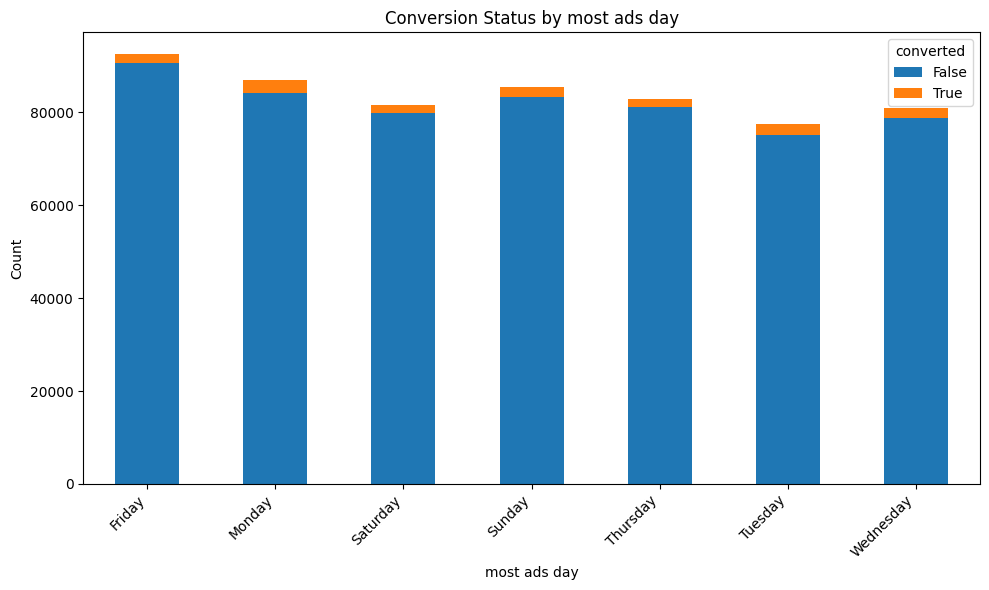

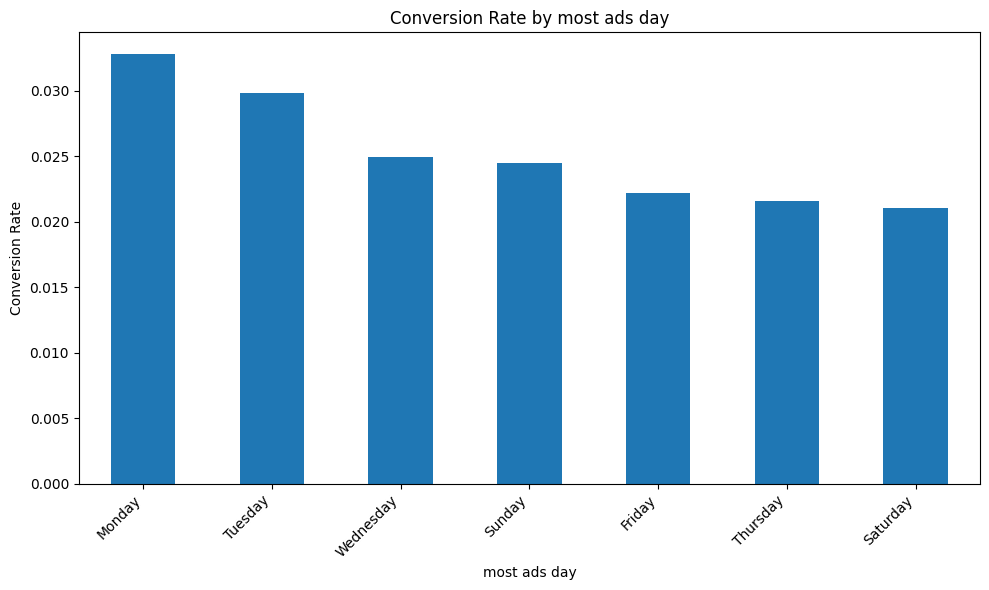


Bivariate Analysis: total ads vs. converted


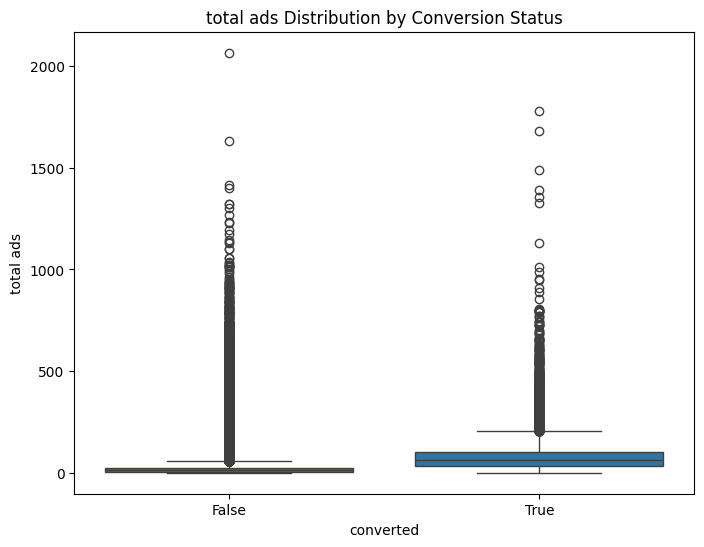

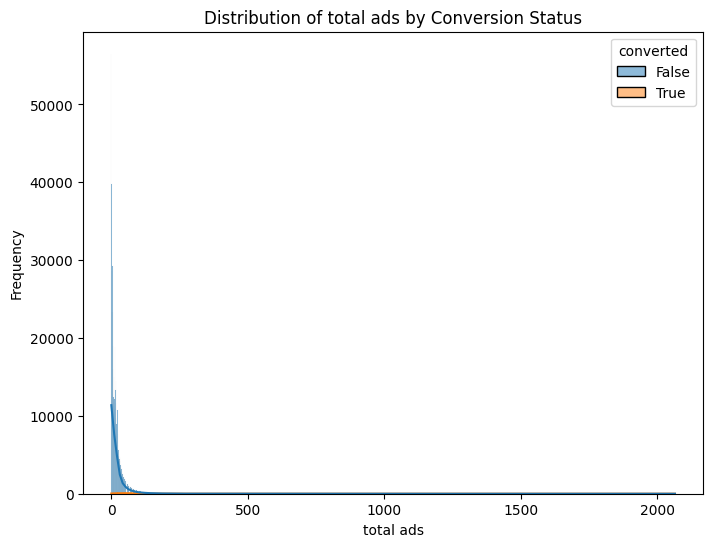


Summary Statistics of total ads by converted:
              count       mean        std  min   25%   50%    75%     max
converted                                                                
False      573258.0  23.291495  40.863176  1.0   4.0  13.0   26.0  2065.0
True        14843.0  83.887759  87.455498  1.0  35.0  64.0  103.0  1778.0


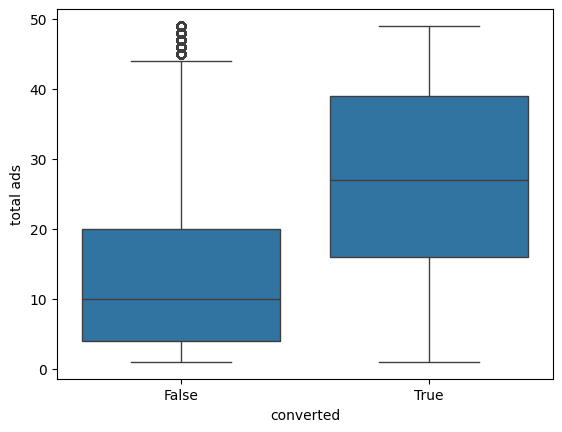

In [19]:
# prompt: give me the code to the bivariate analysis and our target variable is "converted"

import pandas as pd
import matplotlib.pyplot as plt
# Bivariate Analysis with 'converted' as the target variable

# Function to perform bivariate analysis for categorical vs. target
def bivariate_categorical_target(df, categorical_col, target_col='converted'):
  """
  Performs bivariate analysis between a categorical column and the 'converted' target.

  Args:
    df (pd.DataFrame): The input DataFrame.
    categorical_col (str): The name of the categorical column.
    target_col (str): The name of the target variable (default is 'converted').
  """
  print(f"\nBivariate Analysis: {categorical_col} vs. {target_col}")

  # Create a contingency table
  contingency_table = pd.crosstab(df[categorical_col], df[target_col])
  print("\nContingency Table:")
  print(contingency_table)

  # Calculate conversion rates per category
  conversion_rates = contingency_table.apply(lambda x: x / x.sum(), axis=1)
  print(f"\nConversion Rates by {categorical_col}:")
  print(conversion_rates)

  # Visualize with a stacked bar plot
  plt.figure(figsize=(10, 6))
  contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
  plt.title(f'Conversion Status by {categorical_col}')
  plt.xlabel(categorical_col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title=target_col)
  plt.tight_layout()
  plt.show()

  # Visualize with a bar plot showing conversion rate
  plt.figure(figsize=(10, 6))
  # Access the 'True' column which represents converted users
  if True in conversion_rates.columns:
    conversion_rates[True].sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Conversion Rate by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
  else:
    print(f"No 'True' values found in the '{target_col}' column for {categorical_col}. Cannot plot conversion rate.")


# Bivariate Analysis for each categorical column vs. 'converted'
categorical_cols_for_bivariate = ["test group", "most ads hour", "most ads day"]
for col in categorical_cols_for_bivariate:
  bivariate_categorical_target(df, col, target_col='converted')


# Bivariate Analysis for numerical vs. target
def bivariate_numerical_target(df, numerical_col, target_col='converted'):
  """
  Performs bivariate analysis between a numerical column and the 'converted' target.

  Args:
    df (pd.DataFrame): The input DataFrame.
    numerical_col (str): The name of the numerical column.
    target_col (str): The name of the target variable (default is 'converted').
  """
  print(f"\nBivariate Analysis: {numerical_col} vs. {target_col}")

  # Box plot to compare the distribution of the numerical variable for each target class
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=target_col, y=numerical_col, data=df)
  plt.title(f'{numerical_col} Distribution by Conversion Status')
  plt.xlabel(target_col)
  plt.ylabel(numerical_col)
  plt.show()

  # Density plot or histogram for each target class
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=numerical_col, hue=target_col, kde=True)
  plt.title(f'Distribution of {numerical_col} by Conversion Status')
  plt.xlabel(numerical_col)
  plt.ylabel('Frequency')
  plt.show()

  # Calculate summary statistics for the numerical variable grouped by the target
  print(f"\nSummary Statistics of {numerical_col} by {target_col}:")
  print(df.groupby(target_col)[numerical_col].describe())


# Perform bivariate analysis for the numerical column vs. 'converted'
numerical_cols_for_bivariate = ["total ads"]
for col in numerical_cols_for_bivariate:
  bivariate_numerical_target(df, col, target_col='converted')
  sns.boxplot(x='converted', y="total ads", data=df[df["total ads"] < 50]);
  plt.show()
  plt.show()

In [21]:
# Load the data into the df DataFrame (assuming the file is uploaded)
from google.colab import files
import io
import pandas as pd

try:
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

  # Drop the specified columns
  df = df.drop(["Unnamed: 0", "user id"], axis=1)

except Exception as e:
  print(f"Error loading or processing data: {e}")
  # Exit or handle the error appropriately if data loading fails
  exit() # Or raise an exception, depending on desired behavior


from scipy.stats import chi2_contingency

# Perform Chi-Square test for 'test group' vs 'converted'
print("\nChi-Square Test: test group vs. converted")
contingency_table_test_group = pd.crosstab(df['test group'], df['converted'])
chi2, p, dof, expected = chi2_contingency(contingency_table_test_group)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:\n", expected) # Uncomment to see expected frequencies

alpha = 0.05
print(f"\nSignificance level (alpha) = {alpha}")
if p <= alpha:
  print("Result: Reject the null hypothesis. There is a significant association between test group and conversion status.")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant association between test group and conversion status.")

# Perform Chi-Square test for 'most ads hour' vs 'converted'
print("\nChi-Square Test: most ads hour vs. converted")
contingency_table_hour = pd.crosstab(df['most ads hour'], df['converted'])
chi2, p, dof, expected = chi2_contingency(contingency_table_hour)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:\n", expected) # Uncomment to see expected frequencies

alpha = 0.05
print(f"\nSignificance level (alpha) = {alpha}")
if p <= alpha:
  print("Result: Reject the null hypothesis. There is a significant association between most ads hour and conversion status.")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant association between most ads hour and conversion status.")

# Perform Chi-Square test for 'most ads day' vs 'converted'
print("\nChi-Square Test: most ads day vs. converted")
contingency_table_day = pd.crosstab(df['most ads day'], df['converted'])
chi2, p, dof, expected = chi2_contingency(contingency_table_day)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:\n", expected) # Uncomment to see expected frequencies

alpha = 0.05
print(f"\nSignificance level (alpha) = {alpha}")
if p <= alpha:
  print("Result: Reject the null hypothesis. There is a significant association between most ads day and conversion status.")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant association between most ads day and conversion status.")

Saving marketing_AB.csv to marketing_AB (1).csv
User uploaded file "marketing_AB (1).csv" with length 21980992 bytes

Chi-Square Test: test group vs. converted
Chi-Square Statistic: 54.0058
P-value: 0.0000
Degrees of Freedom: 1

Significance level (alpha) = 0.05
Result: Reject the null hypothesis. There is a significant association between test group and conversion status.

Chi-Square Test: most ads hour vs. converted
Chi-Square Statistic: 430.7687
P-value: 0.0000
Degrees of Freedom: 23

Significance level (alpha) = 0.05
Result: Reject the null hypothesis. There is a significant association between most ads hour and conversion status.

Chi-Square Test: most ads day vs. converted
Chi-Square Statistic: 410.0479
P-value: 0.0000
Degrees of Freedom: 6

Significance level (alpha) = 0.05
Result: Reject the null hypothesis. There is a significant association between most ads day and conversion status.


Saving marketing_AB.csv to marketing_AB.csv
User uploaded file "marketing_AB.csv" with length 21980992 bytes

Checking Normality Assumptions for 'total ads' by 'converted' status:

Shapiro-Wilk Test for 'total ads' (converted=True):
Shapiro-Wilk Statistic: 0.6578
P-value: 0.0000
Result: Reject the null hypothesis. 'total ads' for converted=True does not appear normally distributed.

Shapiro-Wilk Test for 'total ads' (converted=False):
Shapiro-Wilk Statistic: 0.4747
P-value: 0.0000
Result: Reject the null hypothesis. 'total ads' for converted=False does not appear normally distributed.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  res = hypotest_fun_out(*samples, **kwds)


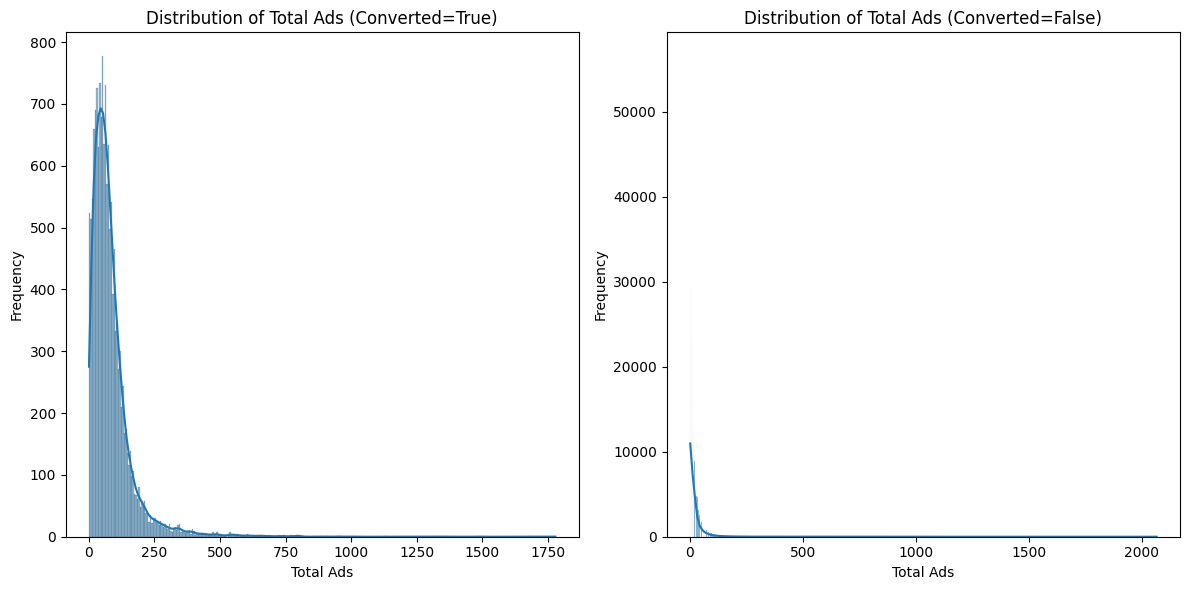

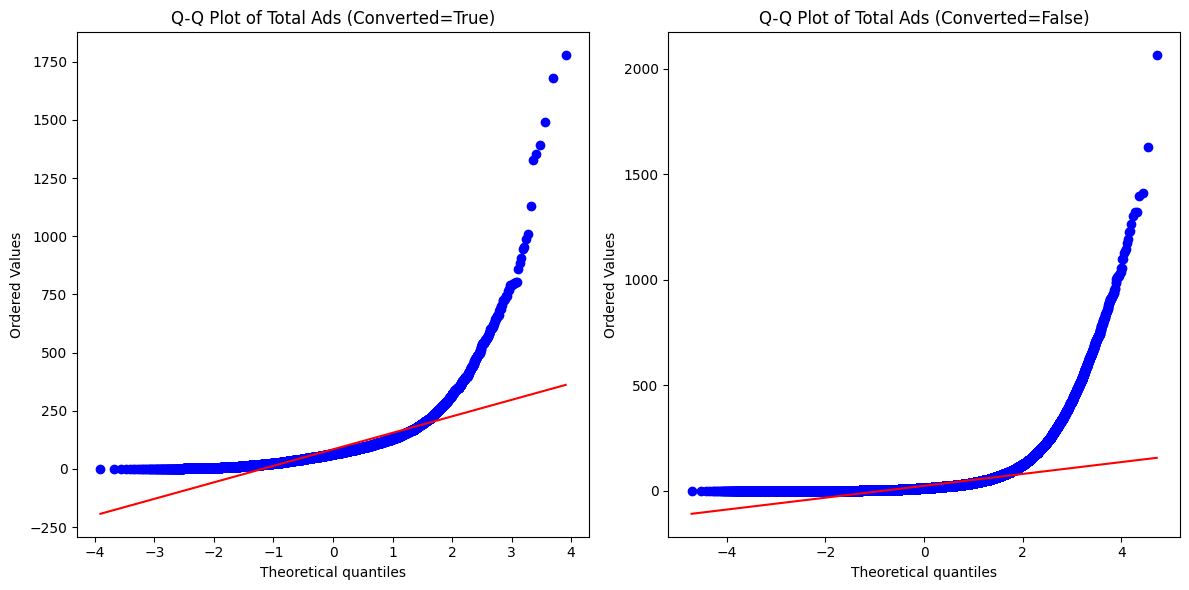

In [3]:
# Load the data into the df DataFrame (assuming the file is uploaded)
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns # Import seaborn as well

try:
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

  # Drop the specified columns
  df = df.drop(["Unnamed: 0", "user id"], axis=1)

except Exception as e:
  print(f"Error loading or processing data: {e}")
  # Exit or handle the error appropriately if data loading fails
  # exit() # Removed exit() to allow subsequent code to run if df is defined elsewhere
  pass # Use pass instead of exit() or raise an exception

# Separate the 'total ads' data based on the 'converted' status
total_ads_converted_true = df[df['converted'] == True]['total ads'].dropna()
total_ads_converted_false = df[df['converted'] == False]['total ads'].dropna()

print("\nChecking Normality Assumptions for 'total ads' by 'converted' status:")

# Shapiro-Wilk test for normality
# H0: The data is drawn from a normal distribution.
# H1: The data is not drawn from a normal distribution.

print("\nShapiro-Wilk Test for 'total ads' (converted=True):")
if len(total_ads_converted_true) >= 3: # Shapiro-Wilk requires at least 3 data points
  # Check for constant values before running Shapiro-Wilk
  if total_ads_converted_true.nunique() > 1:
    shapiro_true_stat, shapiro_true_p_value = stats.shapiro(total_ads_converted_true)
    print(f"Shapiro-Wilk Statistic: {shapiro_true_stat:.4f}")
    print(f"P-value: {shapiro_true_p_value:.4f}")
    alpha = 0.05 # Define alpha here or ensure it's defined globally
    if shapiro_true_p_value <= alpha:
      print("Result: Reject the null hypothesis. 'total ads' for converted=True does not appear normally distributed.")
    else:
      print("Result: Fail to reject the null hypothesis. 'total ads' for converted=True may be normally distributed.")
  else:
    print("'total ads' for converted=True contains constant values. Shapiro-Wilk test is not appropriate.")
else:
  print("Not enough data points (minimum 3) in 'total ads' for converted=True to perform Shapiro-Wilk test.")


print("\nShapiro-Wilk Test for 'total ads' (converted=False):")
if len(total_ads_converted_false) >= 3:
  # Check for constant values before running Shapiro-Wilk
  if total_ads_converted_false.nunique() > 1:
    shapiro_false_stat, shapiro_false_p_value = stats.shapiro(total_ads_converted_false)
    print(f"Shapiro-Wilk Statistic: {shapiro_false_stat:.4f}")
    print(f"P-value: {shapiro_false_p_value:.4f}")
    alpha = 0.05 # Define alpha here or ensure it's defined globally
    if shapiro_false_p_value <= alpha:
      print("Result: Reject the null hypothesis. 'total ads' for converted=False does not appear normally distributed.")
    else:
      print("Result: Fail to reject the null hypothesis. 'total ads' for converted=False may be normally distributed.")
  else:
    print("'total ads' for converted=False contains constant values. Shapiro-Wilk test is not appropriate.")
else:
    print("Not enough data points (minimum 3) in 'total ads' for converted=False to perform Shapiro-Wilk test.")


# Visual inspection of normality
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(total_ads_converted_true, kde=True)
plt.title('Distribution of Total Ads (Converted=True)')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(total_ads_converted_false, kde=True)
plt.title('Distribution of Total Ads (Converted=False)')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Q-Q plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(total_ads_converted_true, dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Ads (Converted=True)')

plt.subplot(1, 2, 2)
stats.probplot(total_ads_converted_false, dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Ads (Converted=False)')
plt.tight_layout()
plt.show()

# Note: Based on the describe() output and the initial histogram for 'total ads' in the preceding code,
# it is highly likely that 'total ads' is not normally distributed due to the large number of outliers and the skewness.
# The tests and visualizations above confirm this for the separated groups as well.
# If normality is a strict assumption for a statistical test you plan to use, you might need to consider:
# 1. Data transformation (e.g., log transformation) if the data is skewed but otherwise unimodal.
# 2. Using non-parametric tests that do not assume normality (e.g., Mann-Whitney U test for comparing groups).

In [4]:
# prompt: give me a code to check the equality of variances between "totals ads" and converted

# Levene's test for equality of variances
# H0: The variances of the two groups are equal.
# H1: The variances of the two groups are not equal.

print("\nLevene's Test for Equality of Variances of 'total ads' between converted=True and converted=False groups:")

# Ensure both groups have at least two data points and not all data points are identical
if len(total_ads_converted_true) > 1 and len(total_ads_converted_false) > 1:
    # Check if variances are zero (can happen if all values in a group are the same)
    if total_ads_converted_true.var() > 1e-9 and total_ads_converted_false.var() > 1e-9: # Use a small epsilon for floating point comparison
        levene_stat, levene_p_value = stats.levene(total_ads_converted_true, total_ads_converted_false)
        print(f"Levene Statistic: {levene_stat:.4f}")
        print(f"P-value: {levene_p_value:.4f}")

        alpha = 0.05
        print(f"\nSignificance level (alpha) = {alpha}")

        if levene_p_value <= alpha:
          print("Result: Reject the null hypothesis. The variances of 'total ads' are significantly different between the converted and not converted groups.")
        else:
          print("Result: Fail to reject the null hypothesis. There is no significant difference in the variances of 'total ads' between the converted and not converted groups.")
    else:
        print("Cannot perform Levene's test: One or both groups of 'total ads' have zero variance (all values are the same).")
else:
    print("Cannot perform Levene's test: One or both groups of 'total ads' have less than 2 data points.")

# You can also calculate and compare the standard deviations directly
print("\nStandard Deviation of 'total ads' (converted=True):", total_ads_converted_true.std())
print("Standard Deviation of 'total ads' (converted=False):", total_ads_converted_false.std())


Levene's Test for Equality of Variances of 'total ads' between converted=True and converted=False groups:
Levene Statistic: 9121.1970
P-value: 0.0000

Significance level (alpha) = 0.05
Result: Reject the null hypothesis. The variances of 'total ads' are significantly different between the converted and not converted groups.

Standard Deviation of 'total ads' (converted=True): 87.4554981471138
Standard Deviation of 'total ads' (converted=False): 40.863175949103564
